In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt
import random

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 1


In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [4]:
#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0
#X_train = X_train.reshape(-1, 28*28).astype("float32") / 255.0
#X_test = X_test.reshape(-1, 28*28).astype("float32") / 255.0

In [5]:
X_train.shape

(60000, 28, 28, 1)

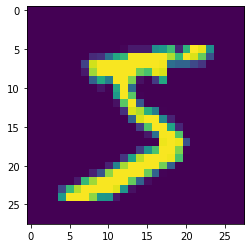

In [6]:
plt.imshow(X_train[0])

In [7]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28, 28, 1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu',kernel_initializer='he_uniform'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               460900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
h = model.fit(x=X_train, y=Y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.6472 - accuracy: 0.9419 - val_loss: 0.1093 - val_accuracy: 0.9749
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0879 - accuracy: 0.9795 - val_loss: 0.0912 - val_accuracy: 0.9783
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0631 - accuracy: 0.9860 - val_loss: 0.1035 - val_accuracy: 0.9809
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0568 - accuracy: 0.9890 - val_loss: 0.1217 - val_accuracy: 0.9823
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0471 - accuracy: 0.9904 - val_loss: 0.2004 - val_accuracy: 0.9810
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0393 - accuracy: 0.9936 - val_loss: 0.1901 - val_accuracy: 0.9816
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0350 - accuracy: 0.9941 - val_loss: 0.1809 - val_accuracy

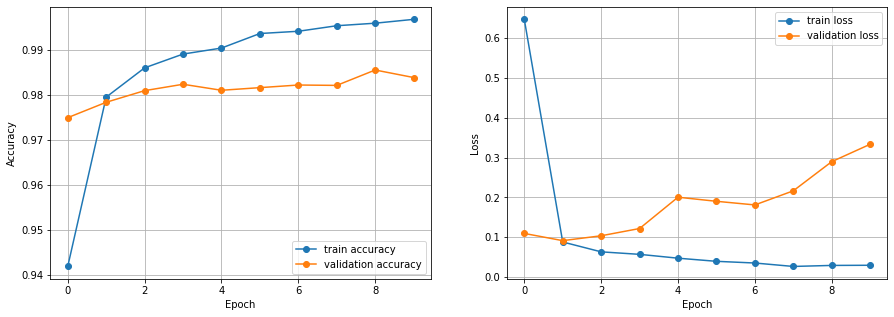

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.3090 - accuracy: 0.9814

Test Accuracy: 0.9814000129699707

Test Loss: 0.309005469083786


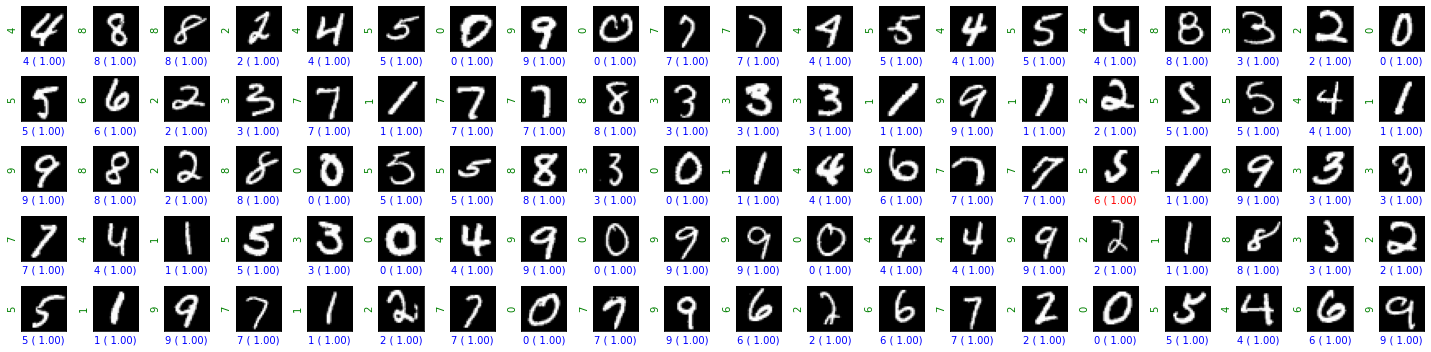

In [13]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()